In [2]:
!pip install pyupbit
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 7.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pyupbit

df = pyupbit.get_ohlcv("KRW-BTC", interval='minute60')
df

,open,high,low,close,volume,value
2022-05-23 12:00:00+00:00,38753000.0,38818000.0,38643000.0,38803000.0,182.112548,7.058555e+09
2022-05-23 13:00:00+00:00,38801000.0,38887000.0,38700000.0,38711000.0,160.981857,6.246672e+09
2022-05-23 14:00:00+00:00,38739000.0,38869000.0,38707000.0,38852000.0,108.951148,4.226717e+09
2022-05-23 15:00:00+00:00,38852000.0,39220000.0,38814000.0,39037000.0,227.734331,8.889724e+09
2022-05-23 16:00:00+00:00,39037000.0,39153000.0,38877000.0,38883000.0,162.699067,6.346910e+09
...,...,...,...,...,...,...
2022-05-31 16:00:00+00:00,39414000.0,39633000.0,39414000.0,39507000.0,148.883256,5.885377e+09
2022-05-31 17:00:00+00:00,39507000.0,39760000.0,39500000.0,39726000.0,161.200572,6.390073e+09
2022-05-31 18:00:00+00:00,39726000.0,39739000.0,39544000.0,39619000.0,101.774814,4.032558e+09
2022-05-31 19:00:00+00:00,39619000.0,39807000.0,39619000.0,39807000.0,89.096402,3.538432e+09


In [4]:
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['open']/1200
data = df[['ds','y']]
data['ds'] = data['ds'].dt.tz_localize(None)
#data['ds'] = pd.to_numeric(data['ds'])
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ds,y
0,2022-05-23 12:00:00,32335.833333
1,2022-05-23 13:00:00,32259.166667
2,2022-05-23 14:00:00,32376.666667
3,2022-05-23 15:00:00,32530.833333
4,2022-05-23 16:00:00,32402.500000
...,...,...
195,2022-05-31 16:00:00,32922.500000
196,2022-05-31 17:00:00,33105.000000
197,2022-05-31 18:00:00,33015.833333
198,2022-05-31 19:00:00,33172.500000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


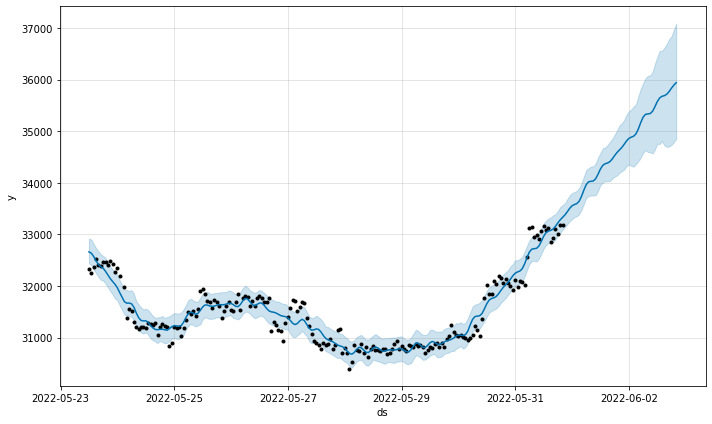

In [5]:
from fbprophet import Prophet

model = load_model('/content/drive/MyDrive/Colab Notebooks/model1.h5')
model.fit(data)

future = model.make_future_dataframe(periods=48,freq='H')
forecast = model.predict(future)

fig1 = model.plot(forecast)

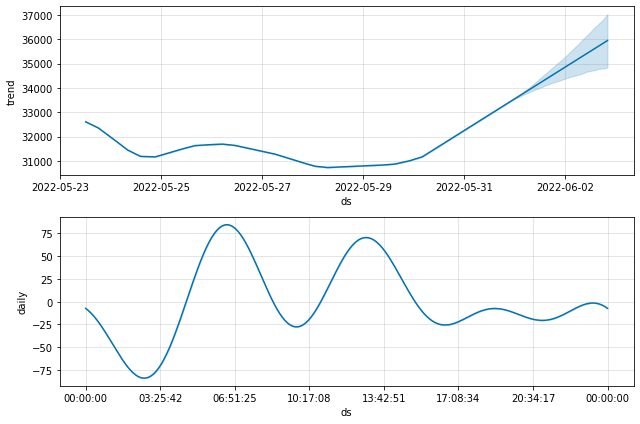

In [6]:
fig2 = model.plot_components(forecast)